In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os, sys
import SimpleITK as sitk
%load_ext autoreload
%autoreload 2

In [59]:
animal = 'DK39'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
INPUT = os.path.join(DIR, 'CH1', 'thumbnail_cleaned')
MASKED = os.path.join(DIR, 'rotated_masked')
ELASTIX = os.path.join(DIR, 'elastix')

In [9]:
PATH = '/home/eddyod/programming/pipeline_utility'
sys.path.append(PATH)
from utilities.utilities_registration import register_test

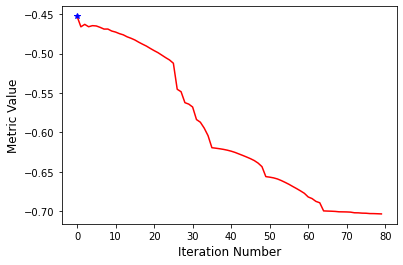

Final metric value: -0.7035380089816845
Optimizer's stopping condition, RegularStepGradientDescentOptimizerv4: Maximum number of iterations (25) exceeded.
rotation, xshift, yshift (1.0068954611671155, 0.12191211192480789, -49.4970952091402, -17.191450817181444)
center (959.9599816863847, 491.68844594717933)


In [95]:
# dk39, 169, 170 have a lot of shift and rotation
fixed_index = str(123).zfill(3)
moving_index = str(124).zfill(3)

final_transform, fixed, moving, R = register_test(MASKED, INPUT, fixed_index, moving_index)    


# Always check the reason optimization terminated.
stop_condition = R.GetOptimizerStopConditionDescription()
iterations = R.GetOptimizerIteration()
metric_value = R.GetMetricValue()
finalParameters = final_transform.GetParameters()
fixedParameters = final_transform.GetFixedParameters()

print(f'Final metric value: {metric_value}')
print(f'Optimizer\'s stopping condition, {condition}')
print('rotation, xshift, yshift', finalParameters)
print('center', fixedParameters)

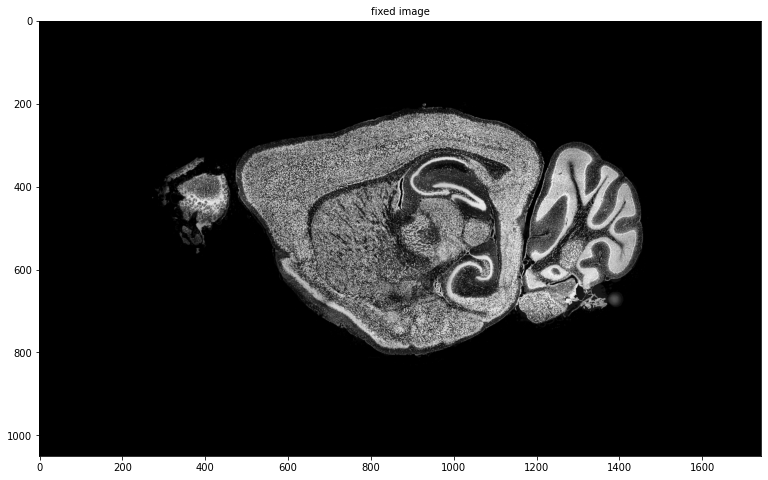

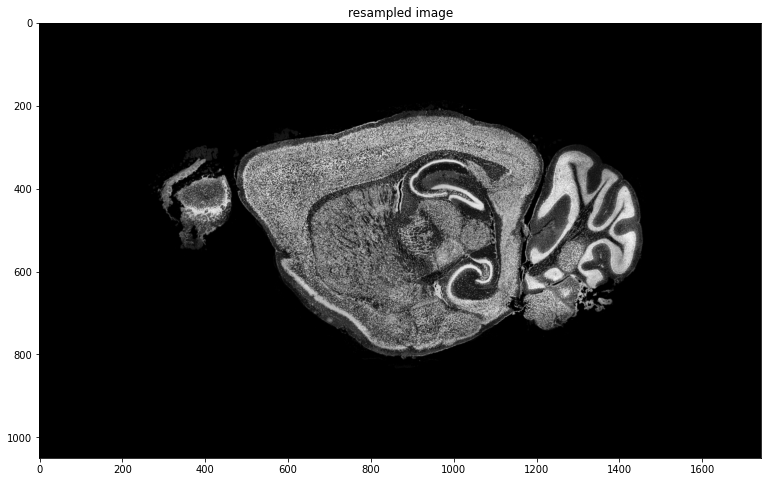

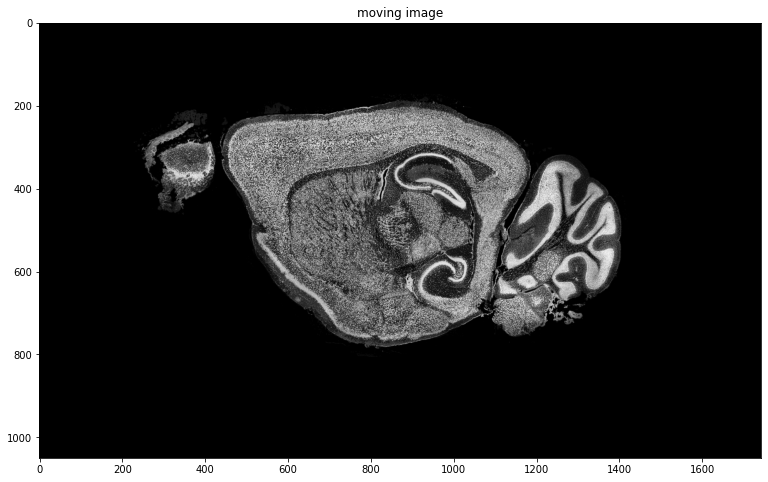

In [94]:
moving_resampled = sitk.Resample(moving, fixed, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
fig = plt.figure(figsize=(15,8))
plt.imshow(sitk.GetArrayViewFromImage(fixed), cmap='gray')
plt.title('fixed image', fontsize=10)

fig = plt.figure(figsize=(15, 8))
plt.imshow(sitk.GetArrayViewFromImage(moving_resampled), cmap='gray')
plt.title('resampled image')

fig = plt.figure(figsize=(15, 8))
plt.title('moving image')
plt.imshow(sitk.GetArrayViewFromImage(moving), cmap='gray')
    